In [1]:
##Revannath Jondhale ## Taken assignment work for the PCA-Principal-Component-Analysis

In [2]:
##problem statement : Perform Principal component analysis and perform clustering using first 
##3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
##optimum number of clusters and check whether we have obtained same number of clusters with the original data 
##(class column we have ignored at the begining who shows it has 3 clusters)df


In [6]:
## for the Above statment provided Wine CSV file now we going impirt the libraries 

In [5]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
wine=pd.read_csv('C:/Users/hp/Desktop/Revannath Data Sci/Assignments/8/wine.csv')

In [10]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
from sklearn.decomposition import PCA

In [14]:
from sklearn.preprocessing import scale

In [15]:
wine.data = wine.iloc[:,1:]

<ipython-input-15-801fe5986366>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine.data = wine.iloc[:,1:]


In [16]:
wine.data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
# Normalizing the data using the inbuilt function

In [18]:
wine_norm = scale(wine.data)

In [19]:
# Now creating PCA's with given data

In [20]:
pca = PCA(n_components = 13)

In [21]:
pca_values = pca.fit_transform(wine_norm)

In [22]:
# The amount of variance each pca explaains is 

In [23]:
var = pca.explained_variance_ratio_

In [24]:
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [25]:
pca.components_[0]

array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
        0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
        0.29671456,  0.37616741,  0.28675223])

In [26]:
#Cumuative variance

In [27]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)

In [28]:
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [29]:
#Variance plot for pca components is obtained as

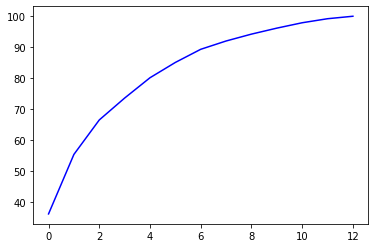

In [30]:
plt.plot(var1, color = "blue")

In [31]:
# Let's plot the plot between PCA1 and PCA2

In [32]:
x = pca_values[:,0]

In [33]:
y = pca_values[:,1]

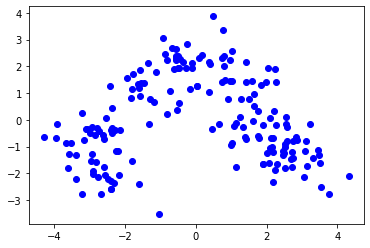

In [34]:
plt.plot(x,y,"bo")

In [35]:
# From the graph we can see that there is no relationaship between the PCA1 and PCA2 at all

In [36]:
##doing clustering##

In [37]:
# Now we will use clustering on the pca

In [38]:
# First we will use the Hierarchical clustering 

# We have been asked to create the clusters based on the only first 3 principle components scores


In [39]:
wine_pca = pd.DataFrame(pca_values[:,:3])

In [40]:
from scipy.cluster.hierarchy import linkage

In [41]:
import scipy.cluster.hierarchy as sch

In [42]:
z = linkage(wine_pca,method='complete', metric = 'euclidean')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [52.5, 52.5, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [66.25, 66.25, 102.5, 102.5],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [170.0, 170.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [215.0, 215.0, 240.0, 240.0],
  [181.25, 181.25, 227.5, 227.5],
  [140.0, 140.0, 204.375, 204.375],
  [84.375, 84.375, 172.1875, 172.1875],
  [20.0, 20.0, 128.28125, 128.28125],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [292.5, 292.5, 322.5, 322.5],
  [345.0, 

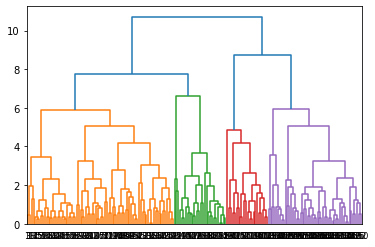

In [43]:
sch.dendrogram(
        z,
        leaf_rotation = 0.,
        leaf_font_size = 8.
)

In [44]:
# From the dendrogram we can say that 4 clusters will be optimum for our data

In [45]:
# Now lets use the agglomerative clustering

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
h_complete_pca = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete').fit(wine_pca)

In [48]:
h_complete_pca.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 0, 3,
       3, 2, 2, 3, 2, 3, 0, 0, 3, 2, 2, 0, 3, 3, 2, 3, 0, 1, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 0, 2, 3, 3, 2, 2, 0, 2, 2, 0, 2, 0, 2, 3,
       3, 2, 0, 0, 0, 0, 2, 0, 2, 2, 3, 0, 1, 0, 3, 0, 0, 1, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [49]:
# Converting h_complete_pca.labels into series

In [50]:
cluster_labels_pca = pd.Series(h_complete_pca.labels_)

In [51]:
# Creating the new  column clust and assigning

In [52]:
h_wine_pca = wine.copy()

In [53]:
h_wine_pca['clust'] = cluster_labels_pca

In [54]:
h_wine_pca

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [55]:
# Let's shift the position of the clust column to initial

In [56]:
h_wine_pca = h_wine_pca.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [57]:
h_result_pca = h_wine_pca.groupby(h_wine_pca.clust).mean()

In [58]:
h_result_pca

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,1.964286,12.193929,2.023571,2.449286,22.453571,94.321429,2.129643,2.066786,0.422857,1.504643,2.934643,1.050000,2.814643,503.571429
1,2.940000,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
2,2.045455,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636
3,1.256410,13.377692,1.982564,2.391154,17.432051,104.743590,2.812436,2.877051,0.281923,1.985513,4.978462,1.068077,3.118333,979.397436


In [59]:
# Create final csv file of the dataframe

In [60]:
import os        # Importing os

In [61]:
os.getcwd() # getting current working directory

'C:\\Users\\hp'

In [62]:
os.chdir("C:/Users/hp/Desktop/Revannath Data Sci/Assignments/8") ## changed to currecnt file saving location

In [63]:
h_wine_pca.to_csv("h_wine_pca", index = False)

In [64]:
# Now we will use kmeans clustering

In [65]:
from sklearn.cluster import KMeans

In [66]:
from scipy.spatial.distance import cdist

In [67]:
# First create skree plot or elbow curve plot for the desicion of the K value

In [68]:
k = list(range(2,15))

In [69]:
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [70]:
TWSSPCA = [] # For storing the total within sum squared value

In [71]:
# We are creating the function for deciding the K value

In [72]:
type(wine_pca)

pandas.core.frame.DataFrame

In [73]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(wine_pca)
    WSSPCA = []  # variable for storing within sum of squared values of clusters 
    for j in range (i):
        WSSPCA.append(sum(cdist(wine_pca.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,wine_pca.shape[1]),"euclidean")))
    TWSSPCA.append(sum(WSSPCA))

In [74]:
# plotting scree plot

([<matplotlib.axis.XTick at 0x1f34deae310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

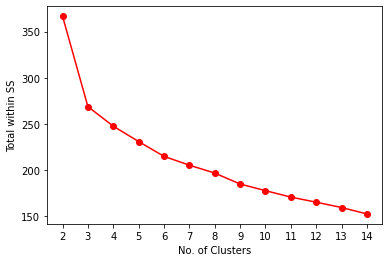

In [75]:
plt.plot(k,TWSSPCA,'ro-');plt.xlabel("No. of Clusters");plt.ylabel("Total within SS");plt.xticks(k)

In [76]:
# According to the plot 3 clusters should be optimum

In [77]:
pca_model = KMeans(n_clusters = 3)  # Creating model 

In [78]:
# Parantu we need to take only first three principle component scores 
# Due to we will use wine_pca which we have created earlier 

In [79]:
pca_model.fit(wine_pca)

KMeans(n_clusters=3)

In [80]:
pca_model.labels_   # Getting labels 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [81]:
labels = pd.Series(pca_model.labels_) # converting labels into series

In [82]:
k_wine_pca = wine.copy()

In [83]:
k_wine_pca['clust'] = labels   # assigning clust column to the k_wine with labels values 

In [84]:
k_wine_pca.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [85]:
k_wine_pca = k_wine_pca.iloc[:,[14,1,2,3,4,5,6,7,8,9,10,11,12,13]] #shifting clust to the position of the 1st column

In [86]:
k_wine_pca.iloc[:,1:14].groupby(k_wine_pca.clust).mean()  # Taking clusterwise mean of all the columns

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [87]:
# Create csv file 

In [88]:
k_wine_pca.to_csv("k_wine_pca", index  = False)

In [89]:
###________##

In [90]:
# Now we will also apply clustering on the same datasets without PCA and see if there are any major differences.
# First we will use the Hierarchical clustering 

In [91]:
z = linkage(wine_norm,method='complete', metric = 'euclidean')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [75.0, 75.0, 100.0, 100.0],
  [31.25, 31.25, 87.5, 87.5],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [161.25, 161.25, 203.75, 203.75],
  [130.0, 130.0, 182.5, 182.5],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [156.25, 156.25, 251.25, 251.25],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [345.0, 345.0, 355.0, 355.0],
  [365.0, 365.0, 375.0, 37

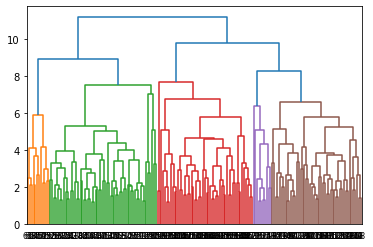

In [92]:
sch.dendrogram(
        z,
        leaf_rotation = 0.,
        leaf_font_size = 8.
)

In [93]:
# From the dendrogram we can say that 5 clusters will be optimum for our data

# Now lets use the agglomerative clustering

In [94]:
h_complete = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete').fit(wine_norm)

In [96]:
h_complete.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 3, 1,
       1, 0, 3, 1, 3, 0, 0, 0, 0, 3, 3, 3, 1, 0, 0, 0, 0, 2, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [97]:
# Converting h_complete.labels into series

In [98]:
cluster_labels = pd.Series(h_complete.labels_)

In [99]:
h_wine = wine.copy()

In [100]:
h_wine['clust'] = cluster_labels

In [101]:
h_wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [102]:
# Let's shift the position of the clust column to initial

In [103]:
h_wine = h_wine.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [104]:
h_result = h_wine.groupby(h_wine.clust).mean()

In [105]:
h_result

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,1.862069,12.415172,1.989828,2.381379,21.117241,93.844828,2.424828,2.339828,0.366897,1.678103,3.280345,1.057931,2.978448,573.379310
1,1.105263,13.604211,1.982807,2.360526,16.652632,106.368421,2.797719,2.920175,0.274386,2.015088,5.326667,1.051579,3.141228,1073.052632
2,2.941176,13.117843,3.322157,2.431765,21.333333,99.333333,1.675686,0.810588,0.444314,1.164314,7.170980,0.691373,1.709804,622.490196
3,2.000000,12.465000,1.500833,2.045833,17.341667,98.500000,1.913333,1.475833,0.402500,0.967500,3.395000,1.155500,2.156667,565.000000


In [106]:
# Creating final csv file of the dataframe

In [107]:
h_wine.to_csv("h_wine", index = False)

In [108]:
# Now we will use kmeans clustering

In [109]:
# First create skree plot or elbow curve plot for the desicion of the K value

In [110]:
k = list(range(2,15))

In [111]:
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [112]:
TWSS = [] # For storing the total within sum squared value

In [113]:
# We are creating the function for deciding the K value

In [114]:
type(wine_norm)

numpy.ndarray

In [115]:
# In this case the pca_values is np.array format which does not support following function
# Hence we will convert it into dataframe

In [116]:
dataframe = pd.DataFrame(wine_norm)

In [117]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dataframe)
    WSS = []  # variable for storing within sum of squared values of clusters 
    for j in range (i):
        WSS.append(sum(cdist(dataframe.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,dataframe.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

In [118]:
# plotting scree plot

([<matplotlib.axis.XTick at 0x1f34df3e970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

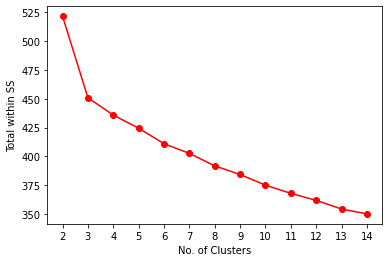

In [119]:
plt.plot(k,TWSS,'ro-');plt.xlabel("No. of Clusters");plt.ylabel("Total within SS");plt.xticks(k)

In [120]:
# According to the plot 3 clusters should be optimum

In [121]:
model = KMeans(n_clusters = 3)  # Creating model 

In [122]:
#  But we need to take only first three principle component scores 
# Hence we will use wine_pca which we have created earlier 

In [123]:
model.fit(wine_norm)

KMeans(n_clusters=3)

In [124]:
model.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [125]:
labels = pd.Series(model.labels_) # converting labels into series

In [126]:
k_wine = wine.copy() ##DF

In [127]:
k_wine['clust'] = labels   # assigning clust column to the k_wine with labels values

In [128]:
k_wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [129]:
k_wine = k_wine.iloc[:,[14,1,2,3,4,5,6,7,8,9,10,11,12,13]] #shifting clust to the position of the 1st column

In [130]:
k_wine.iloc[:,1:14].groupby(k_wine.clust).mean()  # Taking clusterwise mean of all the columns

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,
0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
2,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


In [131]:
##CSV req

In [132]:
k_wine.to_csv("k_wine", index  = False)

In [133]:
# we can conclude that only heirerchical clustering creates variations but KMeans clustering is not affected.